In [191]:
import pandas as pd
import datetime


In [192]:
#import the price data for the specified range, Jan 1,2021 - Feb 28, 2021

price_df = pd.read_csv('blmn_close_prices.csv')

price_df['date'] = price_df['time']

del price_df['time']

price_df.head()

,BLMN,date
0,18.340,2021-01-04 00:00:00-05:00
1,19.050,2021-01-05 00:00:00-05:00
2,20.310,2021-01-06 00:00:00-05:00
3,20.560,2021-01-07 00:00:00-05:00
4,20.675,2021-01-08 00:00:00-05:00


In [193]:
weather_df = pd.read_csv('df_weather_data_updated-downloaded_copy.csv')
weather_df_sliced = weather_df.drop(columns=[
    'request.type', 
    'request.language', 
    'request.unit',
    'location.lat',
    'location.lon',
    'location.timezone_id',
    'location.utc_offset',
    ])

weather_df_sliced = weather_df_sliced.drop(weather_df_sliced.columns[[0,1]], axis=1)

weather_df_sliced.rename(columns={
    'location.region':'state', 
    'request.query': 'zipcode', 
    'location.name': 'city',
    'location.country':'country'
    }, inplace=True)

date = weather_df_sliced.pop('date')
weather_df_sliced.insert(0, 'date', date)

state = weather_df_sliced.pop('state')
weather_df_sliced.insert(1, 'state', state)

weather_df_sliced['date']= pd.to_datetime(weather_df_sliced['date']).dt.date
price_df['date'] = pd.to_datetime(price_df['date']).dt.date

weather_df_sliced

,date,state,zipcode,city,country,temperature,precip,humidity,visibility,pressure,...,heatindex,dewpoint,windchill,windgust,feelslike,mintemp,maxtemp,avgtemp,totalsnow,sunhour
0,2021-01-01,Florida,34231,Sarasota,USA,23,0.0,82,10,1019,...,22,18,21,45,21,20,23,21,0.0,8.7
1,2021-01-01,Florida,34201,Bradenton,USA,24,0.0,79,10,1020,...,23,18,22,41,23,20,24,22,0.0,8.7
2,2021-01-01,Florida,33710,Saint Petersburg,USA,21,0.0,83,10,1019,...,21,17,20,51,20,20,21,21,0.0,8.7
3,2021-01-01,Florida,34994,Stuart,USA,26,0.0,75,10,1021,...,26,19,24,31,26,23,26,25,0.0,8.7
4,2021-01-01,Florida,32309,Tallahassee,USA,23,2.1,90,9,1018,...,21,18,20,27,20,18,23,21,0.0,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49203,2021-01-27,Florida,33322,Fort Lauderdale,USA,29,0.2,67,10,1018,...,27,19,26,16,27,22,29,26,0.0,10.9
49204,2021-01-28,Florida,33322,Fort Lauderdale,USA,22,0.0,60,10,1020,...,22,12,21,29,21,15,22,21,0.0,10.1
49205,2021-01-29,Florida,33322,Fort Lauderdale,USA,19,0.1,60,10,1024,...,18,10,18,27,18,17,19,18,0.0,7.0
49206,2021-01-30,Florida,33322,Fort Lauderdale,USA,20,0.1,60,10,1023,...,19,11,19,24,19,18,20,19,0.0,5.5


In [196]:

grouped_weather_df = weather_df_sliced.groupby(["state", 'date'], as_index=False).mean()

type(grouped_weather_df.loc[0][0])

states = list(grouped_weather_df.state.unique())

In [207]:
corr_results = []

for state in states:

    weather_state_df = grouped_weather_df[grouped_weather_df['state'] == state]  
    weather_state_df = pd.merge(weather_state_df, price_df, how='outer', on='date').dropna() 
    weather_corr = weather_state_df.corr()['BLMN']
    #weather_corr.append({"state":state})
    corr_results.append(weather_corr) 

corr_results_df = pd.DataFrame(corr_results)
corr_results_df["state"] = states
corr_results_df = corr_results_df.set_index("state")
corr_results_df = corr_results_df.drop(columns="zipcode")

corr_results_df.style.bar(align="zero", color=['#D65F5F', '#80A1C1'])

,temperature,precip,humidity,visibility,pressure,cloudcover,heatindex,dewpoint,windchill,windgust,feelslike,mintemp,maxtemp,avgtemp,totalsnow,sunhour,BLMN
state,,,,,,,,,,,,,,,,,
Alabama,0.287254,0.203285,0.109299,-0.065909,-0.003408,0.087396,0.236736,0.221969,0.211938,0.058623,0.211556,0.201695,0.287254,0.254776,-0.188241,-0.021500,1.000000
Arizona,0.346141,-0.089185,-0.276261,0.077919,-0.199574,-0.257102,0.403887,-0.104513,0.358437,-0.091100,0.358437,0.331807,0.346141,0.380048,-0.087334,0.535628,1.000000
Arkansas,-0.004607,-0.092279,0.202547,-0.186212,0.002795,0.180255,-0.042138,0.039145,-0.059932,0.132723,-0.059932,-0.071468,-0.004607,-0.039478,0.006294,0.140730,1.000000
California,0.286412,-0.304097,-0.271501,0.320112,0.041036,-0.389934,0.283142,-0.170660,0.265384,-0.098463,0.265999,0.232671,0.286412,0.253002,-0.252734,0.355472,1.000000
Colorado,-0.136112,0.317729,0.311475,-0.184483,-0.046114,0.098985,-0.156349,0.213695,-0.164802,-0.093483,-0.164802,-0.244705,-0.136112,-0.134044,0.318168,0.127612,1.000000
Delaware,-0.063324,0.117494,0.100619,0.030731,0.189237,0.005745,-0.164152,-0.057660,-0.150850,0.152972,-0.150850,-0.323189,-0.063324,-0.150690,0.147309,-0.049998,1.000000
Florida,0.479731,0.498766,0.230261,-0.018886,0.067644,0.105170,0.428957,0.344773,0.400161,0.018026,0.412371,0.366872,0.479731,0.430672,nan,0.397039,1.000000
Georgia,0.345122,0.246016,0.154144,-0.128053,0.058189,0.088161,0.319020,0.268905,0.288831,0.032595,0.288574,0.254308,0.345122,0.307709,-0.094376,0.212489,1.000000
Hawaii,-0.193532,0.098171,-0.342656,-0.139192,-0.103610,-0.138035,-0.189712,-0.297011,-0.205161,0.293103,-0.171500,-0.106816,-0.193532,-0.274524,nan,0.271725,1.000000


In [ ]:

florida_merged_df = pd.merge(florida_df, price_df, how='outer', on='date').dropna()
del florida_merged_df['zipcode']
florida_merged_df.head()

,state,date,temperature,precip,humidity,visibility,pressure,cloudcover,heatindex,dewpoint,windchill,windgust,feelslike,mintemp,maxtemp,avgtemp,totalsnow,sunhour,BLMN
3,Florida,2021-01-04,18.531100,0.124402,60.258373,9.966507,1018.114833,28.937799,17.062201,8.641148,16.239234,17.559809,16.377990,14.363636,18.531100,16.593301,0.0,7.513397,18.340
4,Florida,2021-01-05,18.732057,0.000000,55.483254,10.000000,1018.382775,0.669856,15.473684,6.282297,15.071770,18.449761,15.071770,12.444976,18.732057,15.866029,0.0,8.700000,19.050
5,Florida,2021-01-06,18.557971,0.002899,57.804348,10.000000,1019.275362,14.449275,14.971014,6.391304,14.224638,17.847826,14.224638,11.804348,18.557971,15.253623,0.0,8.560870,20.310
6,Florida,2021-01-07,20.796748,1.148780,63.804878,9.943089,1016.934959,58.373984,18.113821,10.495935,17.219512,23.186992,17.219512,14.715447,20.796748,18.284553,0.0,5.806504,20.560
7,Florida,2021-01-08,19.130081,0.996748,72.252033,9.853659,1013.829268,64.731707,18.146341,12.601626,17.382114,31.601626,17.544715,15.056911,19.130081,18.016260,0.0,5.278862,20.675


In [28]:
florida_merged_df.corr()["BLMN"].sort_values()

visibility    -0.018886
windgust       0.018026
pressure       0.067644
cloudcover     0.105170
humidity       0.230261
dewpoint       0.344773
mintemp        0.366872
sunhour        0.397039
windchill      0.400161
feelslike      0.412371
heatindex      0.428957
avgtemp        0.430672
temperature    0.479731
maxtemp        0.479731
precip         0.498766
BLMN           1.000000
totalsnow           NaN
Name: BLMN, dtype: float64

<AxesSubplot:xlabel='temperature', ylabel='BLMN'>

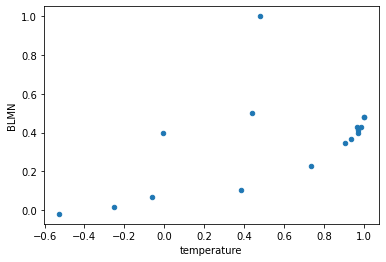

In [23]:
florida_merged_df.corr().plot.scatter(y = "BLMN",x = "temperature")

<AxesSubplot:xlabel='precip', ylabel='BLMN'>

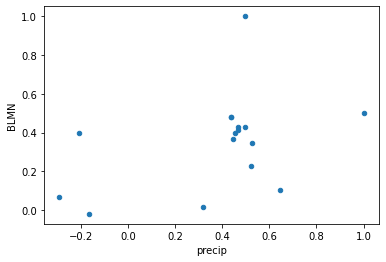

In [24]:
florida_merged_df.corr().plot.scatter(y = "BLMN",x = "precip")

<AxesSubplot:xlabel='heatindex', ylabel='BLMN'>

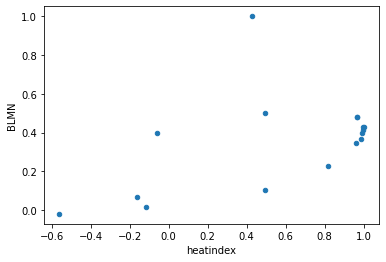

In [25]:
florida_merged_df.corr().plot.scatter(y = "BLMN",x = "heatindex")